# Scatter plot. График точками.

In [1]:
import pandas as pd
import matplotlib.pyplot as plt

In [2]:
data = pd.read_csv('../data/sf_pe_salaries_2011.csv')  # Загрузка данных их файла
data

,Id,BasePay
0,1,167411.18
1,2,155966.02
2,3,212739.13
3,4,77916
4,5,134401.6
...,...,...
148649,148650,0
148650,148651,Not Provided
148651,148652,Not Provided
148652,148653,Not Provided


In [3]:
data = data.reindex(data['Id'])  # Реиндексация по Id
data

,Id,BasePay
Id,,
1,2.0,155966.02
2,3.0,212739.13
3,4.0,77916
4,5.0,134401.6
5,6.0,118602
...,...,...
148650,148651.0,Not Provided
148651,148652.0,Not Provided
148652,148653.0,Not Provided


In [4]:
data = data.drop('Id', 1)  # Удаление ненужной колонки, которая стала индексом
data

,BasePay
Id,
1,155966.02
2,212739.13
3,77916
4,134401.6
5,118602
...,...
148650,Not Provided
148651,Not Provided
148652,Not Provided


In [6]:
data['BasePay'] = data['BasePay'].replace('Not Provided', '0')  # Заменяем в DF "Not Provided" на "0"
data

,BasePay
Id,
1,155966.02
2,212739.13
3,77916
4,134401.6
5,118602
...,...
148650,0
148651,0
148652,0


In [7]:
data = data.fillna('0')  # Все 'NaN' меняем на "0"
data

,BasePay
Id,
1,155966.02
2,212739.13
3,77916
4,134401.6
5,118602
...,...
148650,0
148651,0
148652,0


In [9]:
data['BasePay'] = data['BasePay'].astype(float)  # Меняем тип данных в колонке на 'float'
data

,BasePay
Id,
1,155966.02
2,212739.13
3,77916.00
4,134401.60
5,118602.00
...,...
148650,0.00
148651,0.00
148652,0.00


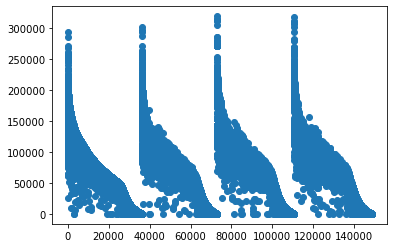

In [11]:
x_axis = data.index  # Ось X
y_axis = data['BasePay'].values  # Ось Y
plt.scatter(x_axis, y_axis)  # вывод графика точками
plt.show()

Видно, что данные получены от 4 агентств и начинаются с самых больших зарплат.

Отсортируем все числа от 0 до максимума

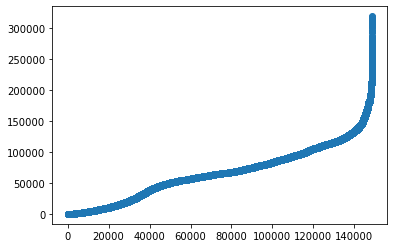

In [12]:
y_axis_sorted = sorted(y_axis)  # Сортируем все значения из колонки 'BasePay' Ось Y

plt.scatter(x_axis, y_axis_sorted)  # вывод графика точками
plt.show()

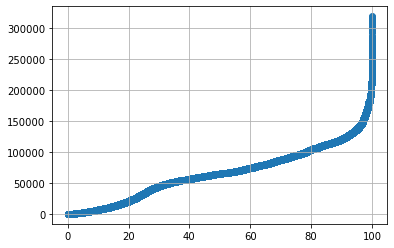

In [13]:
x_axis_percentile = data.index / data.index.max() * 100  # Ось X показывает прорцентное соотношение

plt.scatter(x_axis_percentile, y_axis_sorted)  # вывод графика точками
plt.grid()  # Добавляеи сетку на график
plt.show()

## Разбиение на группы

In [16]:
# Не очищенные данные
base_pay = data['BasePay'].values
print(base_pay)
print(f' До очистки:{len(base_pay)}')

[155966.02 212739.13  77916.   ...      0.        0.        0.  ]
 До очистки:148654


Уберем все значения меньше 1000, т.к. такие зарплаты за год получат либо волантеры, либо разовые работники.

In [17]:
base_pay = base_pay[base_pay > 1000]
print(base_pay)
print(f' После очистки:{len(base_pay)}')

[155966.02 212739.13  77916.   ...   1010.75   1009.56   1008.41]
 После очистки:143870


Теперь эти значения нужно рапределить по группам, чтобы определить сколько людей находится в каждой из категорий.

In [19]:
step = 20000  # Шаг категории
buckets = list(range(1000, int(base_pay.max()), step))  # Список категорий с шагом зарплаты 20000
print(buckets)
print(f'{len(buckets)=}')

[1000, 21000, 41000, 61000, 81000, 101000, 121000, 141000, 161000, 181000, 201000, 221000, 241000, 261000, 281000, 301000]
len(buckets)=16


In [23]:
for bucket_start in buckets:
    bucket_end = bucket_start + step
    print(bucket_start, bucket_end)  # Вывод групп с начальным и конечным значением

1000 21000
21000 41000
41000 61000
61000 81000
81000 101000
101000 121000
121000 141000
141000 161000
161000 181000
181000 201000
201000 221000
221000 241000
241000 261000
261000 281000
281000 301000
301000 321000


Теперь подсчитываем количество людей в каждой категории 

In [25]:
chelikov_in_buckets = []
for bucket_start in buckets:
    bucket_end = bucket_start + step
    kol_vo = base_pay[(base_pay > bucket_start) & (base_pay < bucket_end)]
    chelikov_in_buckets.append(len(kol_vo))

# Проверяем длину обоих списков
print(len(buckets))
print(len(chelikov_in_buckets))

print(chelikov_in_buckets)

16
16
[25288, 11914, 25304, 30582, 19193, 16774, 8643, 2924, 1984, 764, 323, 84, 40, 31, 10, 12]


Строим график

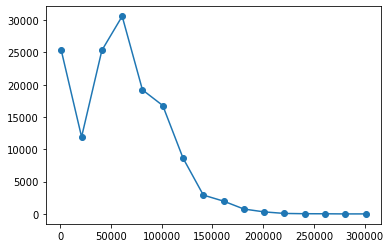

In [26]:
x_axis = buckets
y_axis = chelikov_in_buckets

plt.scatter(x_axis, y_axis)  # Вывод графика точками
plt.plot(x_axis, y_axis)  # Вывод линейного графика
plt.show()